# Water leak use Time Series Prediction with LSTM Recurrent

In [46]:
#import pandas
#import matplotlib.pyplot as plt
#dataset = pandas.read_csv('Insight Data 20200128_132638_data_train.csv', usecols=[1], engine='python')
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [47]:
train_df = pd.read_csv('Insight Data 20200128_132638_data_train.csv')
train_df.head()

,Source,TagName,DateTime,State,Value,Unit,Quality,QualityStatus
0,STL Domae4 M1 Laser Humidity,STL Domae4 M1 Laser1 Humidity,08:50.0,NaN,60.660529,%,192,0
1,STL Domae4 M1 Laser Humidity,STL Domae4 M1 Laser1 Humidity,24:43.9,NaN,60.580000,%,192,0
2,STL Domae4 M1 Laser Humidity,STL Domae4 M1 Laser1 Humidity,36:44.4,NaN,60.930000,%,192,0
3,STL Domae4 M1 Laser Humidity,STL Domae4 M1 Laser1 Humidity,44:44.4,NaN,60.970000,%,192,0
4,STL Domae4 M1 Laser Humidity,STL Domae4 M1 Laser1 Humidity,16:44.6,NaN,61.070000,%,192,0


In [48]:
# for convenience, identify the sensor and operational setting columns
RH_df = train_df[("Value")]
RH_df.head()
#setting_columns = [col for col in train_df.columns if col.startswith("QualityStatus")]

0    60.660529
1    60.580000
2    60.930000
3    60.970000
4    61.070000
Name: Value, dtype: float64

In [49]:
RH_df.describe()
#RH_df.shape[0]

count    691.000000
mean      59.548756
std        8.918035
min       33.960000
25%       59.990000
50%       62.090000
75%       64.160000
max       96.600000
Name: Value, dtype: float64

#format datetime field which comes in as string
#train_df['DateTime'] = pd.to_datetime(train_df['DateTime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of train_df records: %d" % len(train_df.index))
#print(train_df.head())
train_df.describe()

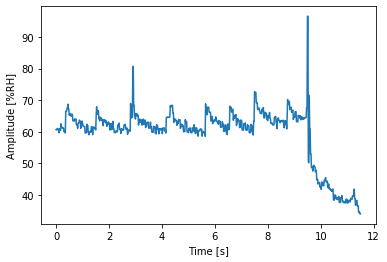

In [50]:
import matplotlib.pyplot as plt
# 60 sec
rate = 60
N = RH_df.shape[0]
L = N / rate

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, RH_df)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [%RH]');

In [52]:
#Let us now examine our sinusoid through application of the DFT:
#from scipy import fftpack
#
#f_s = 1 / rate
#X = fftpack.fft(RH_df)
#freqs = fftpack.fftfreq(len(RH_df)) * f_s
#
#fig, ax = plt.subplots()
#
#ax.stem(freqs, np.abs(X))
#ax.set_xlabel('Frequency in Hertz [Hz]')
#ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)


T=1.0/N

Y = scipy.fftpack.fft(RH_df)
P2 = np.abs(Y / N)
P1 = P2[0 : N // 2 + 1]
P1[1 : -2] = 2 * P1[1 : -2]

plt.ylabel("Y")
plt.xlabel("f")
plt.plot(f, P1)

NameError: name 'scipy' is not defined

                                Source                        TagName  State  \
DateTime                                                                       
08:50.0   STL Domae4 M1 Laser Humidity  STL Domae4 M1 Laser1 Humidity    NaN   
24:43.9   STL Domae4 M1 Laser Humidity  STL Domae4 M1 Laser1 Humidity    NaN   
36:44.4   STL Domae4 M1 Laser Humidity  STL Domae4 M1 Laser1 Humidity    NaN   
44:44.4   STL Domae4 M1 Laser Humidity  STL Domae4 M1 Laser1 Humidity    NaN   
16:44.6   STL Domae4 M1 Laser Humidity  STL Domae4 M1 Laser1 Humidity    NaN   

              Value Unit  Quality  QualityStatus  
DateTime                                          
08:50.0   60.660529    %      192              0  
24:43.9   60.580000    %      192              0  
36:44.4   60.930000    %      192              0  
44:44.4   60.970000    %      192              0  
16:44.6   61.070000    %      192              0  


<Figure size 864x288 with 0 Axes>

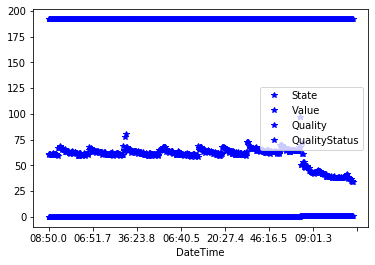

ValueError: could not convert string to float: 'STL Domae4 M1 Laser Humidity'

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd

# Import csv file
#df = pd.read_csv('Insight Data 20200128_132638_data_train.csv', index_col=['DateTime'], parse_dates=['DateTime'])
df = pd.read_csv('Insight Data 20200128_132638_data_train.csv', index_col=['DateTime'], parse_dates=['DateTime'])
print(df.head())

#plot data
plt.figure(figsize=(12,4))
df.plot(linestyle = '', marker = '*', color='b')
plt.savefig('Insight Data 20200128_132638_data_train.jpg')
plt.show()

#FFT
#number of sample points
N = 407
#frequency of signal (in days)
T = 1
#create x-axis for time length of signal
x = np.linspace(0, N*T, N)
#create array that corresponds to values in signal
y = df
#perform FFT on signal
yf = fft(y)
#create new x-axis: frequency from signal
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#plot results
plt.plot(xf, yf[0:N//2], label = 'signal')
plt.grid()
plt.xlabel('Frequency (days)')
plt.ylabel(r'Spectral Amplitude')
plt.legend(loc=1)
plt.savefig('Insight Data 20200128_132638_data_train_fft_firstresult.jpg')
plt.show()